In [2]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
municipality_df = pd.read_csv('../assessment_8/data/municipality_df.csv')
gdp_df = pd.read_csv('../assessment_8/data/gdp_df.csv')

In [4]:
miami = municipality_df[municipality_df['Municipality'] == 'Miami-Fort Lauderdale-West Palm Beach, FL Metro Area']
miami.shape

orlando = municipality_df[municipality_df['Municipality'] == 'Orlando-Kissimmee-Sanford, FL Metro Area']
orlando.shape

tampa = municipality_df[municipality_df['Municipality'] == 'Tampa-St. Petersburg-Clearwater, FL Metro Area']
tampa.shape

(63, 8)

In [5]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Orlando', 'Miami', 'Tampa'))

fig.add_trace(go.Bar(x=orlando['Firm_Sale_Amount'], y=orlando['Amount_of_Firms'], name='Orlando'), row=1, col=1)
fig.add_trace(go.Bar(x=miami['Firm_Sale_Amount'], y=miami['Amount_of_Firms'], name='Miami'), row=1, col=2)
fig.add_trace(go.Bar(x=tampa['Firm_Sale_Amount'], y=tampa['Amount_of_Firms'], name='Tampa'), row=1, col=3)

fig.update_layout(title='Firm Sales vs. Total Firms in all Municipalities', xaxis=dict(title='Firm Sale Amount'), yaxis=dict(title='Amount of Firms'))
fig.show()



In [6]:
grouped_gender_tampa = tampa.groupby('Gender')['Amount_of_Firms'].mean()
grouped_gender_tampa.astype(int)

grouped_gender_orlando = orlando.groupby('Gender')['Amount_of_Firms'].mean()
grouped_gender_tampa.astype(int)

grouped_gender_miami = miami.groupby('Gender')['Amount_of_Firms'].mean()
grouped_gender_tampa.astype(int)

print('Gender Data')
print(grouped_gender_tampa, grouped_gender_orlando, grouped_gender_miami)

grouped_eth_tampa = tampa.groupby('Ethnicity')['Amount_of_Firms'].mean()
grouped_eth_tampa.astype(int)

grouped_eth_orlando = orlando.groupby('Ethnicity')['Amount_of_Firms'].mean()
grouped_gender_tampa.astype(int)

grouped_eth_miami = miami.groupby('Ethnicity')['Amount_of_Firms'].mean()
grouped_eth_tampa.astype(int)
print('==============================')
print('Eth Data')
print(grouped_eth_tampa, grouped_eth_orlando, grouped_eth_miami)

Gender Data
Gender
Equally male/female     980.333333
Female                 1440.000000
Male                   4232.888889
Name: Amount_of_Firms, dtype: float64 Gender
Equally male/female     869.333333
Female                 1268.777778
Male                   3513.777778
Name: Amount_of_Firms, dtype: float64 Gender
Equally male/female     2835.777778
Female                  4366.444444
Male                   11239.000000
Name: Amount_of_Firms, dtype: float64
Eth Data
Ethnicity
Equally Hispanic/non-Hispanic      21.111111
Hispanic                          630.222222
Non-Hispanic                     6038.444444
Name: Amount_of_Firms, dtype: float64 Ethnicity
Equally Hispanic/non-Hispanic       0.000000
Hispanic                          644.777778
Non-Hispanic                     4815.222222
Name: Amount_of_Firms, dtype: float64 Ethnicity
Equally Hispanic/non-Hispanic      235.666667
Hispanic                          5325.333333
Non-Hispanic                     12749.777778
Name: Amount

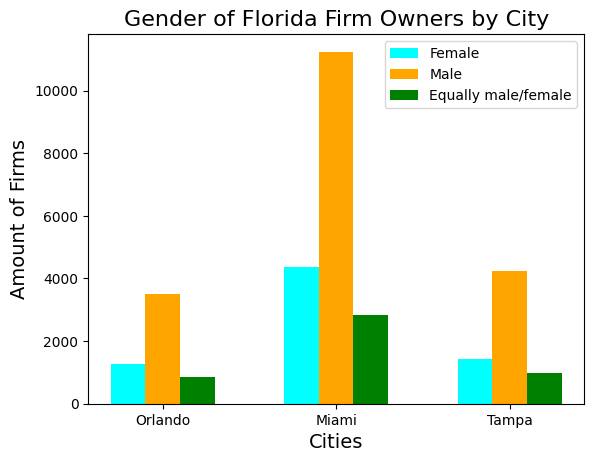

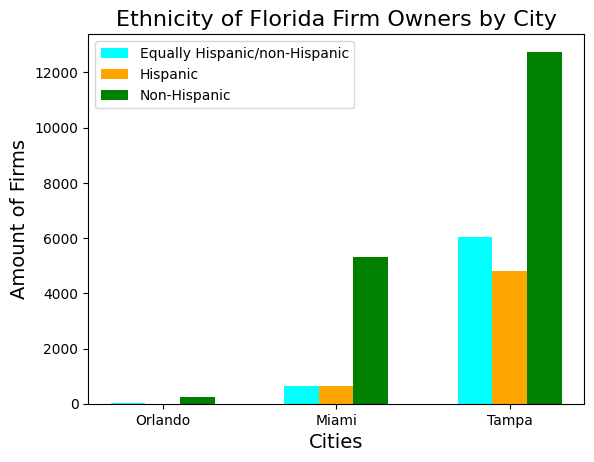

In [7]:
x = np.arange(3)
f = [1268, 4366, 1440]
m = [3513, 11239, 4232]
e = [869, 2835, 980]
width = 0.2

plt.bar(x-0.2, f, width, color='cyan')
plt.bar(x, m, width, color='orange')
plt.bar(x+0.2, e, width, color='green')
plt.xticks(x, ['Orlando', 'Miami', 'Tampa'])
plt.xlabel("Cities", fontsize=14)
plt.ylabel("Amount of Firms", fontsize=14)
plt.title('Gender of Florida Firm Owners by City', fontsize=16)
plt.legend(["Female", "Male", "Equally male/female"])
plt.style.use('default')
plt.show()

x = np.arange(3)
e = [21, 630, 6038]
h = [0, 645, 4815]
nh = [235, 5325, 12749]
width = 0.2

plt.bar(x-0.2, e, width, color='cyan')
plt.bar(x, h, width, color='orange')
plt.bar(x+0.2, nh, width, color='green')
plt.xticks(x, ['Orlando', 'Miami', 'Tampa'])
plt.xlabel("Cities", fontsize=14)
plt.ylabel("Amount of Firms", fontsize=14)
plt.title('Ethnicity of Florida Firm Owners by City', fontsize=16)
plt.legend(["Equally Hispanic/non-Hispanic", "Hispanic", "Non-Hispanic"])
plt.style.use('dark_background')
plt.show()

In [8]:
miami_gdp = gdp_df[gdp_df['DATE'] == '2018-01-01']
miami_gdp

firm_amount = municipality_df.groupby('Municipality')['Amount_of_Firms'].sum().reset_index()
firm_amount

,Municipality,Amount_of_Firms
0,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",502602
1,"Orlando-Kissimmee-Sanford, FL Metro Area",154525
2,"Tampa-St. Petersburg-Clearwater, FL Metro Area",184546


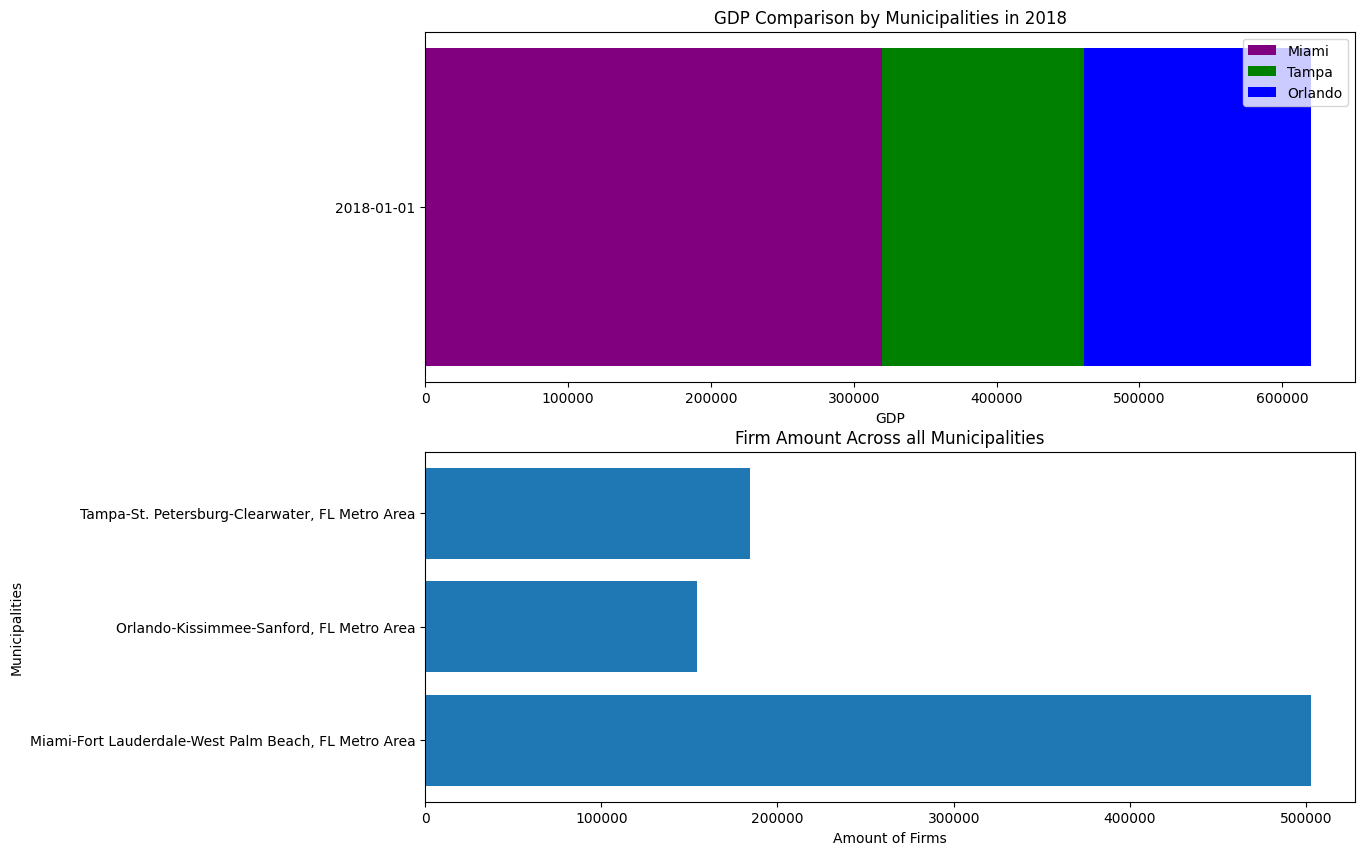

In [30]:
# create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# plot the first chart in the first subplot
y = miami_gdp['DATE']
x1 = miami_gdp['Miami_GDP']
x2 = miami_gdp['Tampa_GDP']
x3 = miami_gdp['Orlando_GDP']
ax1.barh(y, x1, height=0.05, color='purple', align='center')
ax1.barh(y, x2, height=0.05, color='green', align='center', left=x1)
ax1.barh(y, x3, height=0.05, color='blue', align='center', left=x1+x2)
ax1.set_xlabel('GDP')
ax1.set_ylabel('')
ax1.set_title('GDP Comparison by Municipalities in 2018')
ax1.legend(['Miami', 'Tampa', 'Orlando'])

ax2.barh(firm_amount['Municipality'], firm_amount['Amount_of_Firms'])
ax2.set_title('Firm Amount Across all Municipalities')
ax2.set_xlabel('Amount of Firms')
ax2.set_ylabel('Municipalities')
plt.show()

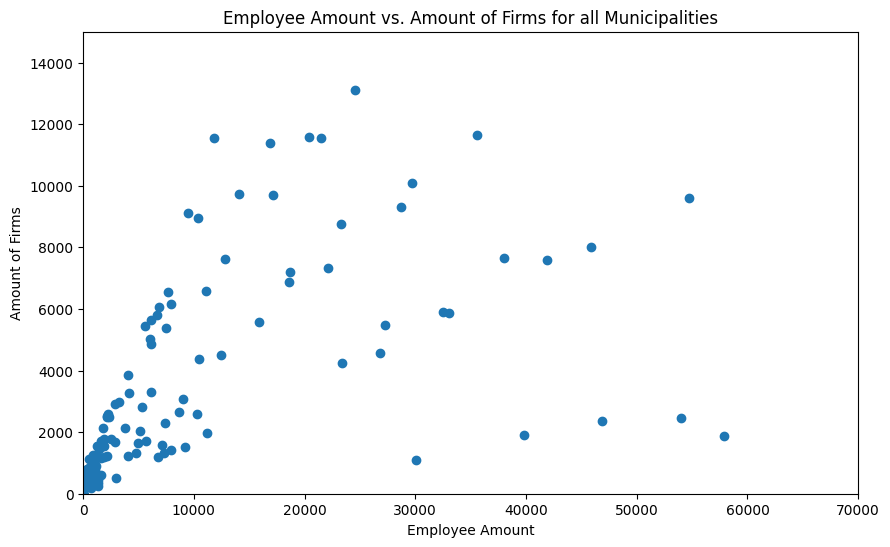

Correlation Matrix:


,Employee_Amount,Amount_of_Firms
Employee_Amount,1.000000,0.614902
Amount_of_Firms,0.614902,1.000000


In [29]:
correl_matrix = municipality_df[['Employee_Amount', 'Amount_of_Firms']]
correl_matrix
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(correl_matrix['Employee_Amount'], correl_matrix['Amount_of_Firms'])
plt.xlabel('Employee Amount')
plt.ylabel('Amount of Firms')
plt.title('Employee Amount vs. Amount of Firms for all Municipalities')
plt.xlim(0, 70000)
plt.ylim(0, 15000)
plt.style.use('default')
plt.show()
# outliers to show
# as employee goes higher, does not mean there are more firms
# plt.xlim(0, 1000000)
# plt.ylim(0, 100000) 


df = pd.DataFrame(correl_matrix)
print('Correlation Matrix:')
corrM = df.corr()
corrM